In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)

### Import of candidate pathogenic mutations from MitoMap found in Helix data normalized per gene per bp 
This table presents the proportion of Helix alleles detected per gene that are indels, transitions, or transversions, which are also listed in MitoMap.  It also presents the per base pair rates per gene of homoplasmic and heteroplasmic variants

In [5]:
normPathVars = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/normHelMitoVars.csv")
normPathVars.head(20)

,gene,indels,transitions,transversions,hom_perbp,het_perbp,seq_type,description
0,MT-ATP6,0.023256,0.616279,0.360465,40.308824,0.866176,protein_coding_gene,ATP synthase F0 subunit 6
1,MT-ATP8,0.045455,0.590909,0.363636,24.000000,0.393204,protein_coding_gene,ATP synthase F0 subunit 8
2,MT-CO1,0.035088,0.543860,0.421053,5.783907,0.199221,protein_coding_gene,Cytochrome c oxidase subunit I
3,MT-CO2,0.000000,0.772727,0.227273,2.573939,0.172767,protein_coding_gene,Cytochrome c oxidase subunit II
4,MT-CO3,0.000000,0.695652,0.304348,4.279693,0.191571,protein_coding_gene,Cytochrome c oxidase subunit III
5,MT-CR,0.038462,0.423077,0.538462,157.073149,6.215879,non_coding,entire Control Region (including displacement ...
6,MT-CYB,0.000000,0.631579,0.368421,54.607018,0.422807,protein_coding_gene,Cytochrome b
7,MT-NC2,0.000000,1.000000,0.000000,8.000000,0.000000,non_coding,non-coding nucleotides
8,MT-NC6,0.000000,1.000000,0.000000,1.500000,0.500000,non_coding,non-coding nucleotides
9,MT-ND1,0.000000,0.690141,0.309859,53.041885,0.600000,protein_coding_gene,NADH Dehydrogenase subunit 1


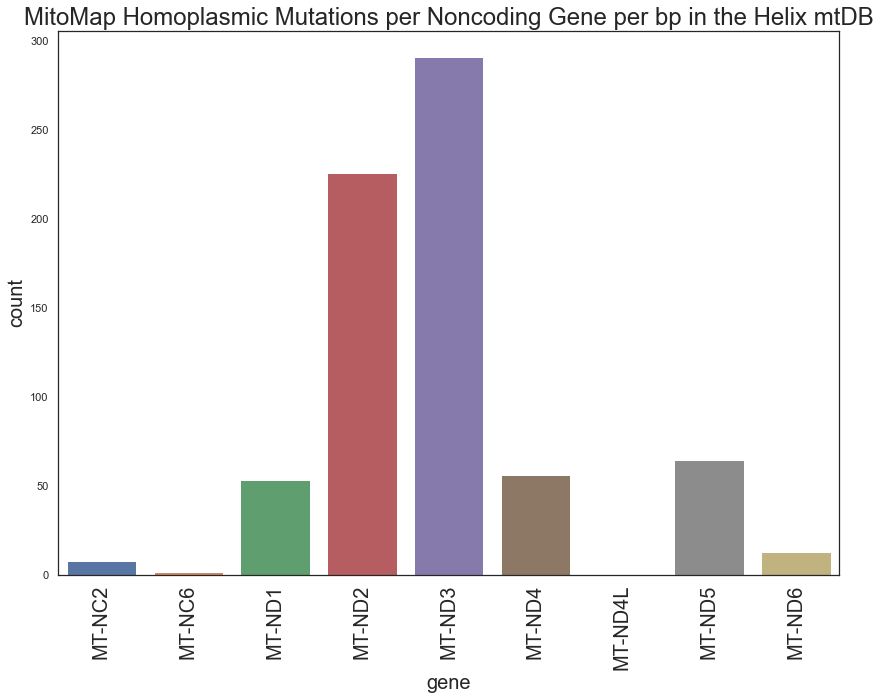

In [10]:
df = normPathVars.iloc[7:16,]
plt.figure(figsize=(14,10))
p = sns.barplot(x = df.loc[:,'gene'], y = df.loc[:,'hom_perbp'])
p.set_xticklabels(df['gene'], rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)
p.set_title('MitoMap Homoplasmic Mutations per Noncoding Gene per bp in the Helix mtDB', fontsize=24);
plt.savefig('nonCodeHomo.pdf')

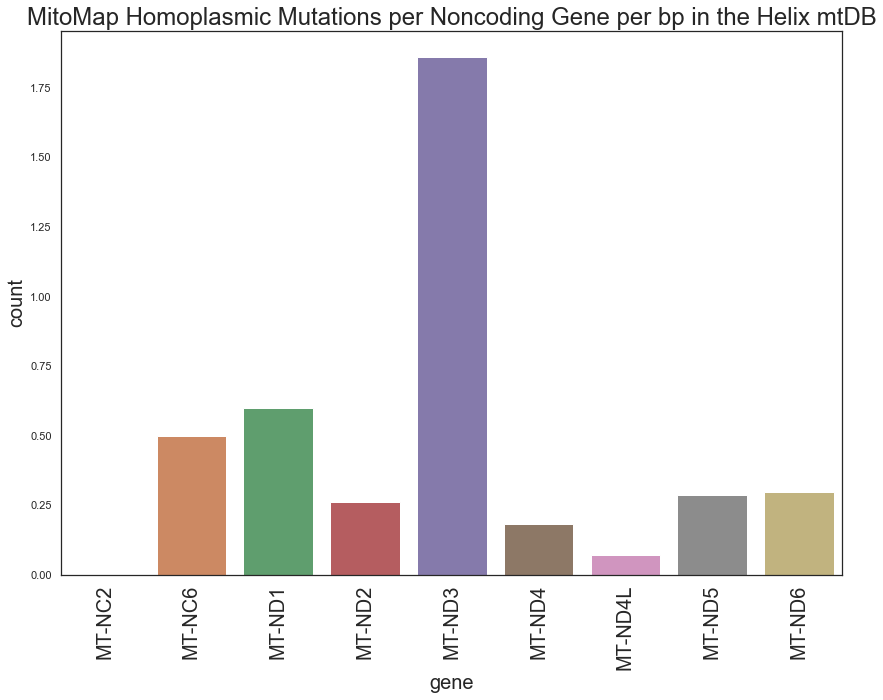

In [12]:
df = normPathVars.iloc[7:16,]
plt.figure(figsize=(14,10))
p = sns.barplot(x = df.loc[:,'gene'], y = df.loc[:,'het_perbp'])
p.set_xticklabels(df['gene'], rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)
p.set_title('MitoMap Homoplasmic Mutations per Noncoding Gene per bp in the Helix mtDB', fontsize=24);
plt.savefig('nonCodeHet.pdf')

### Obtaining the proportions of mutations per gene per mutation type for candidate pathogenic variants found in the Helix mtDB

In [3]:
indels = normPathVars['indels']
transitions = normPathVars['transitions']
transversions = normPathVars['transversions']
proportion = np.concatenate([indels, transitions, transversions])
gene = normPathVars['gene']
seq_type = normPathVars['seq_type']
gene = np.concatenate([gene, gene, gene])
seq_type = np.concatenate([seq_type, seq_type, seq_type])
types =np.array(['indels', 'transitions', 'transversions'])

mutation = np.repeat(types, len(normPathVars['gene']))

pathByMutation = pd.DataFrame({'gene':gene, 'seq_type': seq_type, 'proportion':proportion, 'mutation':mutation})
pathByMutation.head(40)

                        

,gene,seq_type,proportion,mutation
0,MT-ATP6,protein_coding_gene,0.023256,indels
1,MT-ATP8,protein_coding_gene,0.045455,indels
2,MT-CO1,protein_coding_gene,0.035088,indels
3,MT-CO2,protein_coding_gene,0.000000,indels
4,MT-CO3,protein_coding_gene,0.000000,indels
5,MT-CR,non_coding,0.038462,indels
6,MT-CYB,protein_coding_gene,0.000000,indels
7,MT-NC2,non_coding,0.000000,indels
8,MT-NC6,non_coding,0.000000,indels
9,MT-ND1,protein_coding_gene,0.000000,indels


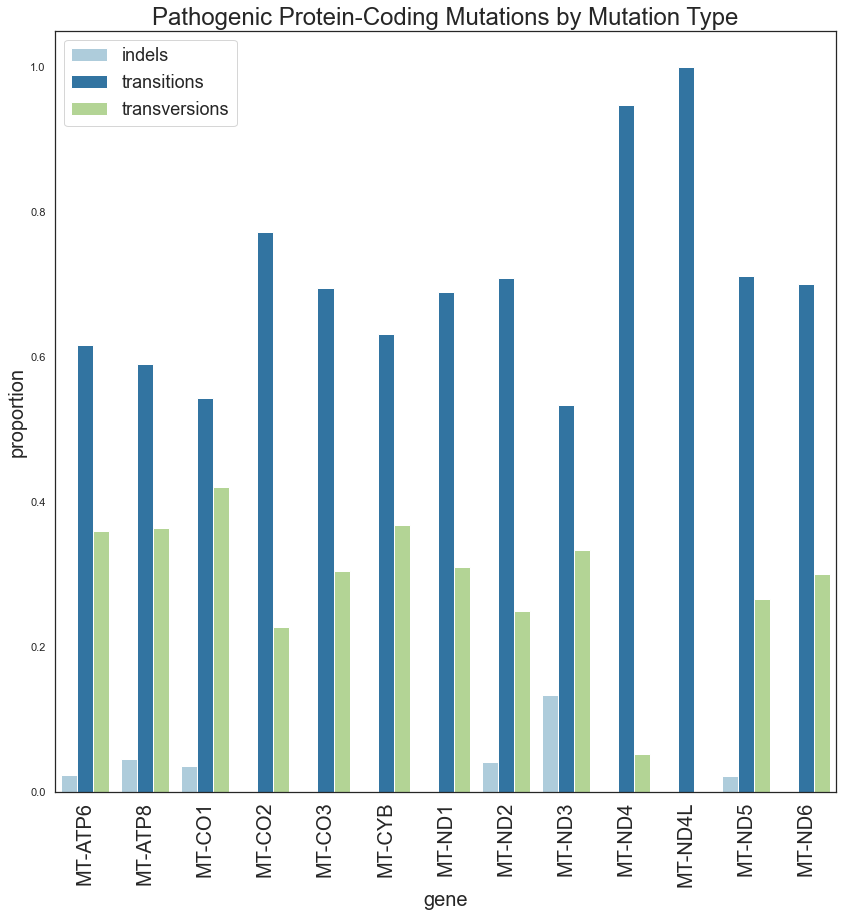

In [4]:
proDF = pathByMutation[pathByMutation['seq_type']=='protein_coding_gene']
plt.figure(figsize=(14,14))
p = sns.barplot(x = proDF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(proDF['gene'], rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
p.set_title('Pathogenic Protein-Coding Mutations by Mutation Type', fontsize = 24);
plt.savefig('candProByMut.pdf') 

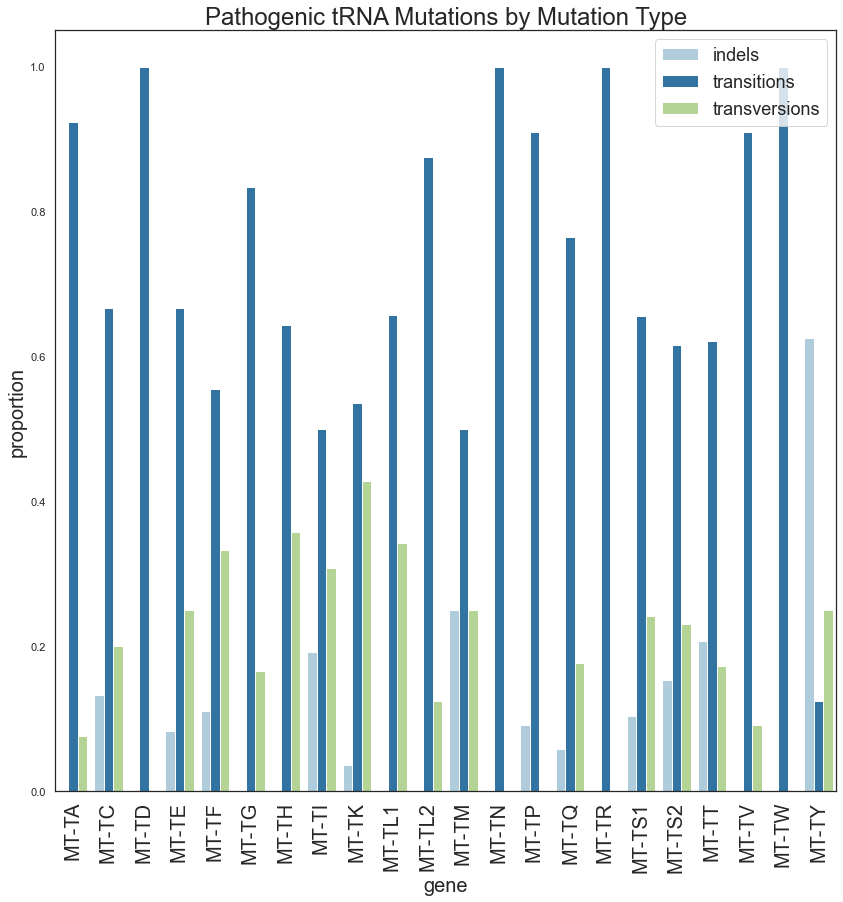

In [9]:
tRNADF = pathByMutation[pathByMutation['seq_type']=='tRNA_gene']
tRNADF
plt.figure(figsize=(14, 14))
p = sns.barplot(x = tRNADF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'],
               palette = sns.color_palette("Paired"))
p.set_xticklabels(tRNADF['gene'], rotation=90, fontsize=20)
p.set_title('Pathogenic tRNA Mutations by Mutation Type', fontsize = 24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
plt.savefig('candtRNAbyMut.pdf')

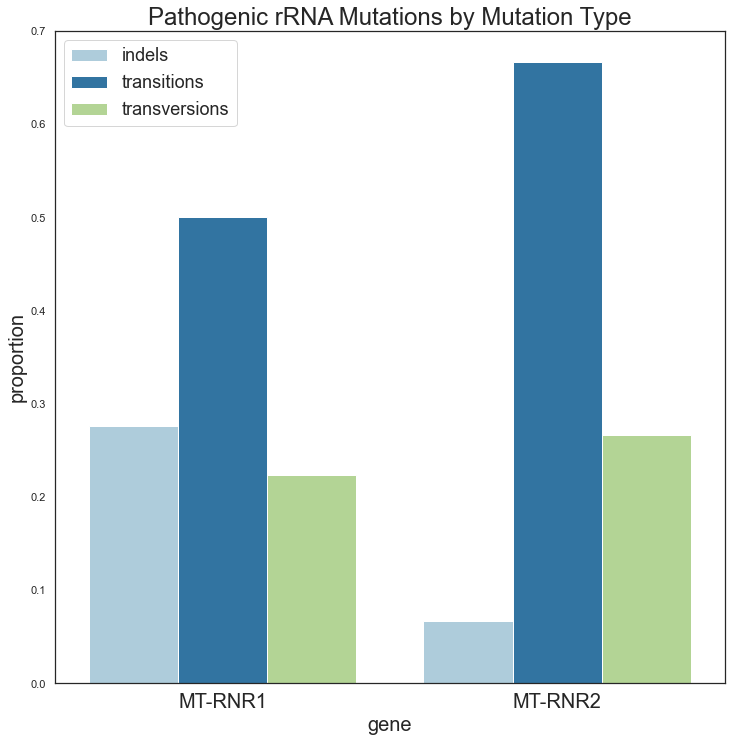

In [10]:
rRNADF = pathByMutation[pathByMutation['seq_type']=='rRNA_gene']
plt.figure(figsize=(12,12))
p = sns.barplot(x = rRNADF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(rRNADF['gene'],fontsize=20)
p.set_title('Pathogenic rRNA Mutations by Mutation Type', fontsize=24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
plt.savefig('candrRNAbyMut.pdf')

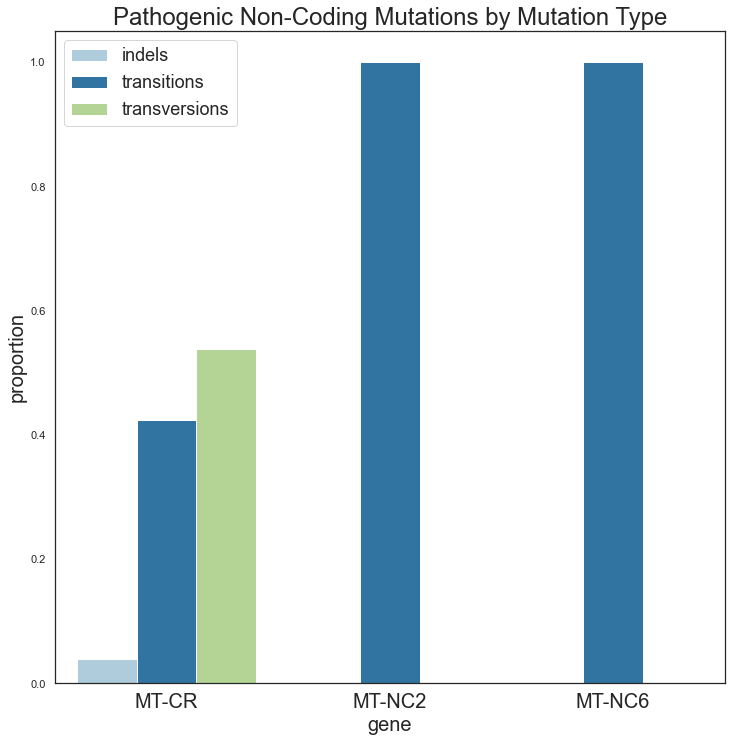

In [11]:
NCDF = pathByMutation[pathByMutation['seq_type']=='non_coding']
plt.figure(figsize=(12,12))
p = sns.barplot(x = NCDF.loc[:,'gene'], y = pathByMutation.loc[:,'proportion'], hue = pathByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(NCDF['gene'], fontsize=20)
p.set_title('Pathogenic Non-Coding Mutations by Mutation Type', fontsize=24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
plt.savefig('candNCbyMut.pdf')

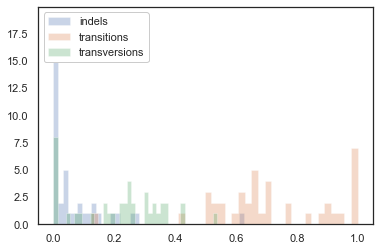

In [91]:
#kwargs (keyword arguments defined as a dict to avoid having to retype them into each function call)
kwargs = dict(histtype = 'stepfilled', alpha = 0.3, bins = 40)
plt.hist(normPathVars.loc[:,'indels'], **kwargs, label = 'indels')
plt.hist(normPathVars.loc[:,'transitions'], **kwargs, label = 'transitions')
plt.hist(normPathVars.loc[:,'transversions'], **kwargs, label = 'transversions')
plt.legend(framealpha = 1, frameon = True, loc = 'upper left');

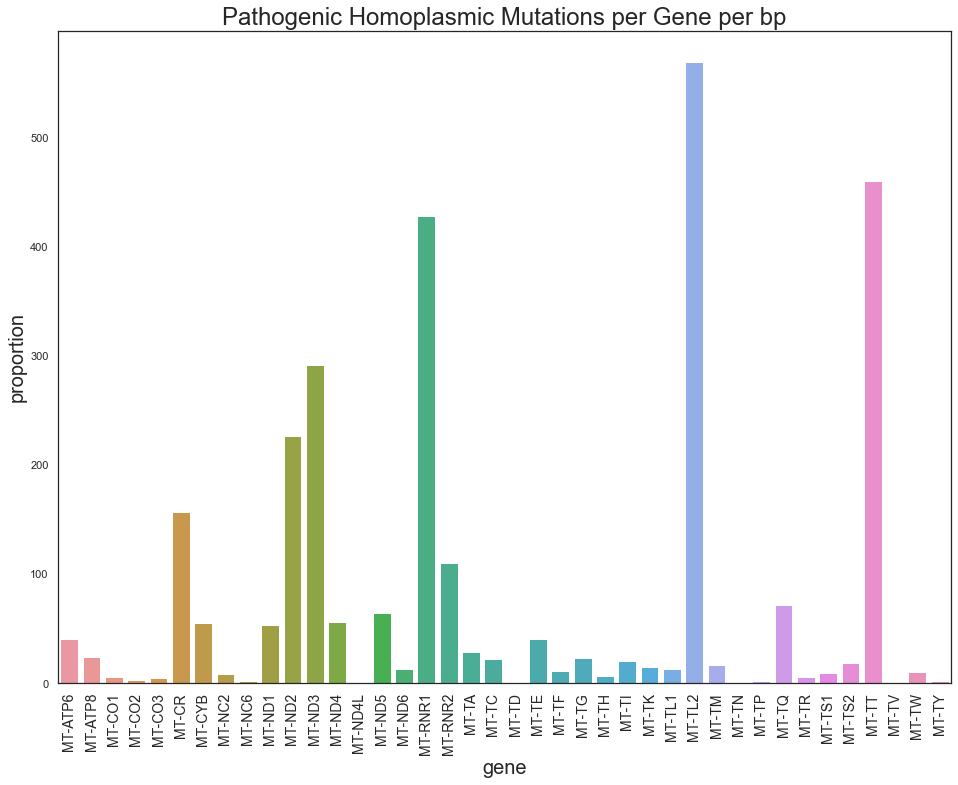

In [19]:
plt.figure(figsize=(16,12))
p = sns.barplot(x = normPathVars.loc[:,'gene'], y = normPathVars.loc[:,'hom_perbp'])
p.set_xticklabels(normPathVars['gene'], rotation=90,fontsize=14)
p.set_title('Pathogenic Homoplasmic Mutations per Gene per bp', fontsize=24);
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
plt.savefig('candHomoPerGene.pdf')


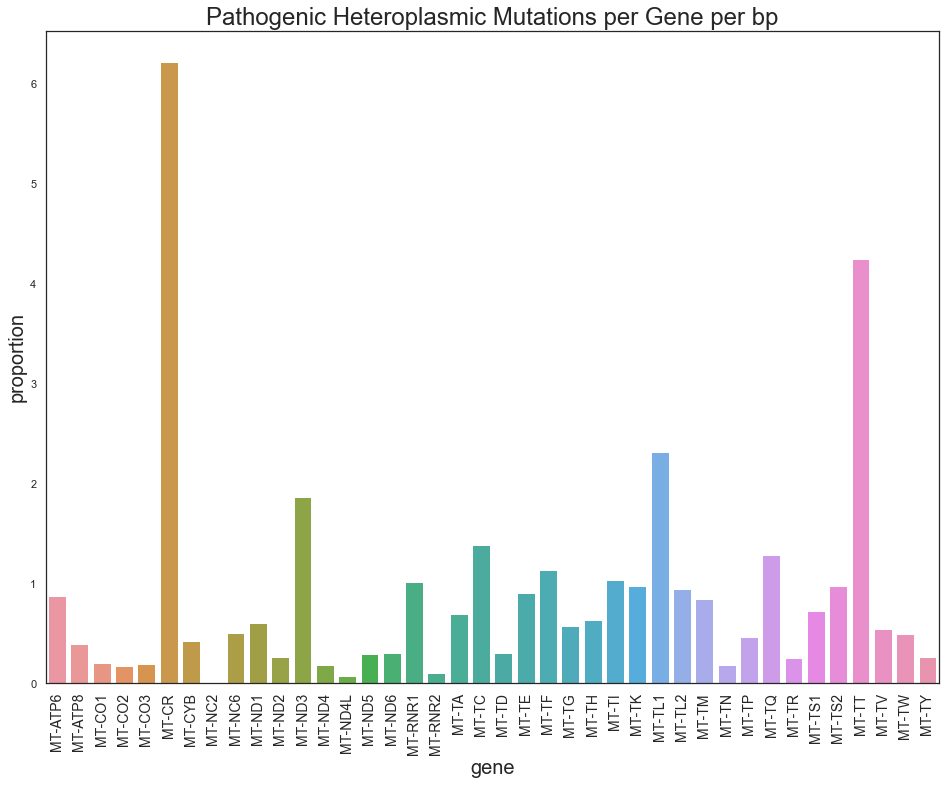

In [20]:
plt.figure(figsize=(16,12))
p = sns.barplot(x = normPathVars.loc[:,'gene'], y = normPathVars.loc[:,'het_perbp'])
p.set_xticklabels(normPathVars['gene'], rotation=90,fontsize=14)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.set_title('Pathogenic Heteroplasmic Mutations per Gene per bp', fontsize=24);
plt.savefig('candHetByGene.pdf')

### Import of Helix mtDB variants normalized per gene per base pair
This table presents the proportion of **all** Helix mtDB alleles detected per gene that are indels, transitions, or transversions.  It also presents the per base pair rates per gene of homoplasmic and heteroplasmic variants
- need to eliminate the NC sequences that are not present in the intersection between Helix mtDB and MitoMap because of their vast excess of homoplasmic mutations

In [3]:
norm_table = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/norm_mtDNA_table.csv")
norm_table = norm_table.iloc[:,1:]
norm_table.head(20)


,gene,indels,transitions,transversions,hom_perbp,het_perbp,seq_type,description
0,MT-ATP6,0.0086,0.6797,0.3117,0.6627,0.00596,protein_coding_gene,ATP synthase F0 subunit 6
1,MT-ATP8,0.0299,0.6828,0.2873,0.5937,0.01522,protein_coding_gene,ATP synthase F0 subunit 8
2,MT-CO1,0.0061,0.7502,0.2437,0.1032,0.00173,protein_coding_gene,Cytochrome c oxidase subunit I
3,MT-CO2,0.0156,0.7500,0.2344,0.1392,0.00413,protein_coding_gene,Cytochrome c oxidase subunit II
4,MT-CO3,0.0241,0.7333,0.2426,0.1760,0.00360,protein_coding_gene,Cytochrome c oxidase subunit III
5,MT-CR,0.1292,0.5087,0.3620,0.5003,0.01803,non_coding,entire Control Region (including displacement ...
6,MT-CYB,0.0077,0.7137,0.2786,0.4240,0.00312,protein_coding_gene,Cytochrome b
7,MT-NC1,0.3333,0.6667,0.0000,162.0000,14.00000,non_coding,non-coding nucleotides
8,MT-NC10,0.0000,0.5000,0.5000,609.0000,7.00000,non_coding,non-coding nucleotides
9,MT-NC2,0.0000,1.0000,0.0000,NaN,NaN,non_coding,non-coding nucleotides


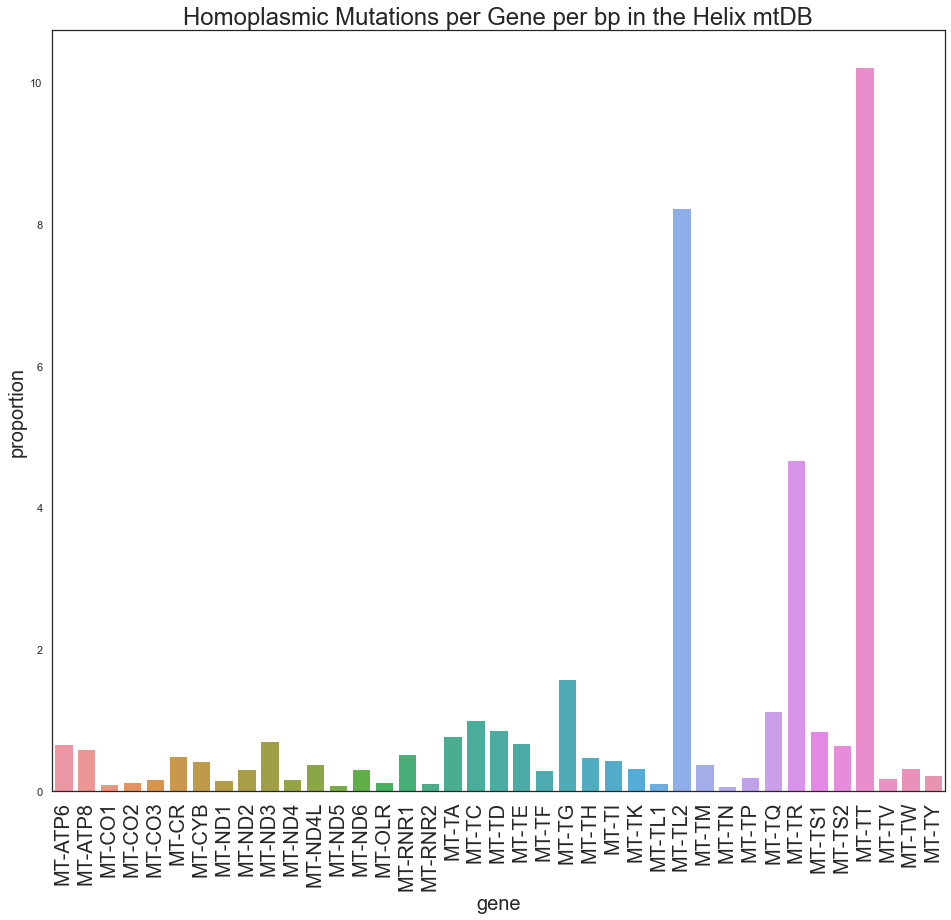

In [23]:
df = norm_table.drop([7,8,9,10,11,12,13,14,15,16], axis=0) # dropping non-coding segments absent from MitoMap
plt.figure(figsize=(16,14))
p = sns.barplot(x = df.loc[:,'gene'], y = df.loc[:,'hom_perbp'])
p.set_xticklabels(df['gene'], rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.set_title('Homoplasmic Mutations per Gene per bp in the Helix mtDB', fontsize=24);
plt.savefig('helixHomoPerGene.pdf')

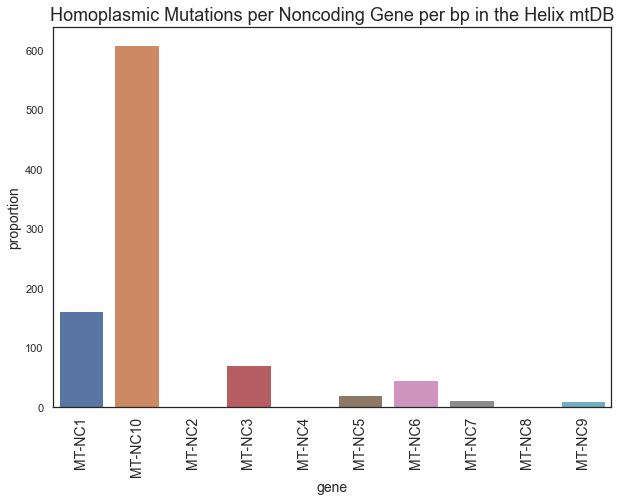

In [23]:
df = norm_table.iloc[7:17,]
plt.figure(figsize=(10,7))
p = sns.barplot(x = df.loc[:,'gene'], y = df.loc[:,'hom_perbp'])
p.set_xticklabels(df['gene'], rotation=90, fontsize=14)
p.set_xlabel('gene', fontsize=14)
p.set_ylabel('count', fontsize=14)
p.set_title('Homoplasmic Mutations per Noncoding Gene per bp in the Helix mtDB', fontsize=18);
plt.savefig('nonCodeHomo.pdf')

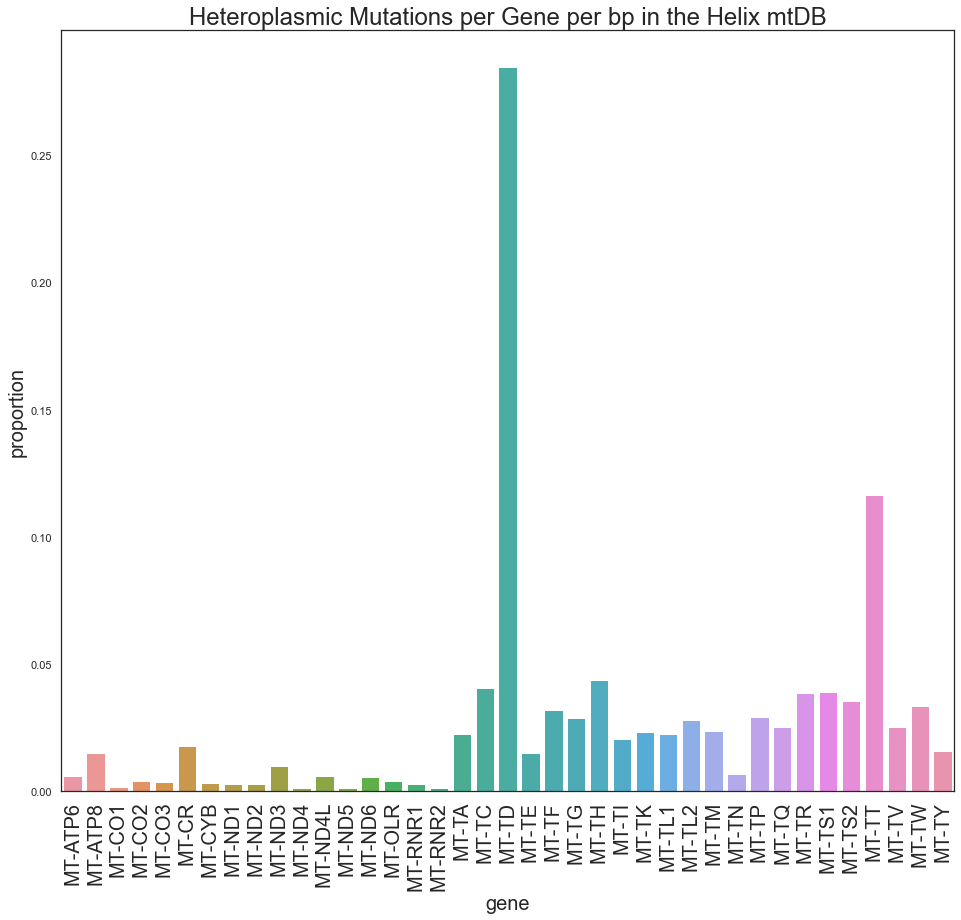

In [24]:
df = norm_table.drop([7,8,9,10,11,12,13,14,15,16], axis=0)
plt.figure(figsize=(16,14))
p = sns.barplot(x = df.loc[:,'gene'], y = df.loc[:,'het_perbp'])
p.set_xticklabels(df['gene'], rotation=90,fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.set_title('Heteroplasmic Mutations per Gene per bp in the Helix mtDB', fontsize=24);
plt.savefig('helixHetPerGene.pdf')

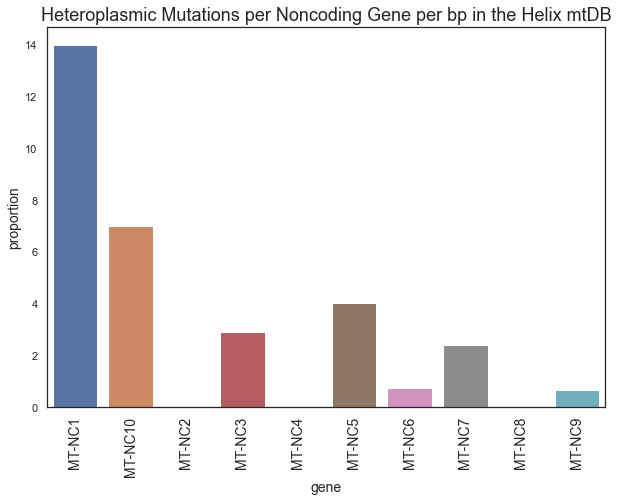

In [26]:
df = norm_table.iloc[7:17,]
plt.figure(figsize=(10,7))
p = sns.barplot(x = df.loc[:,'gene'], y = df.loc[:,'het_perbp'])
p.set_xticklabels(df['gene'], rotation=90, fontsize=14)
p.set_xlabel('gene', fontsize=14)
p.set_ylabel('proportion', fontsize=14)
p.set_title('Heteroplasmic Mutations per Noncoding Gene per bp in the Helix mtDB', fontsize=18);
plt.savefig('nonCodeHet.pdf')

### Obtaining the proportions of mutations per gene per base pair by mutation type for the entire Helix mtDB

In [25]:
indels = norm_table['indels']
transitions = norm_table['transitions']
transversions = norm_table['transversions']
proportion = np.concatenate([indels, transitions, transversions])
gene = norm_table['gene']
seq_type = norm_table['seq_type']
gene = np.concatenate([gene, gene, gene])
seq_type = np.concatenate([seq_type, seq_type, seq_type])
types =np.array(['indels', 'transitions', 'transversions'])

mutation = np.repeat(types, len(norm_table['gene']))

helixByMutation = pd.DataFrame({'gene':gene, 'seq_type': seq_type, 'proportion':proportion, 'mutation':mutation})
helixByMutation.head(40)

,gene,seq_type,proportion,mutation
0,MT-ATP6,protein_coding_gene,0.0086,indels
1,MT-ATP8,protein_coding_gene,0.0299,indels
2,MT-CO1,protein_coding_gene,0.0061,indels
3,MT-CO2,protein_coding_gene,0.0156,indels
4,MT-CO3,protein_coding_gene,0.0241,indels
5,MT-CR,non_coding,0.1292,indels
6,MT-CYB,protein_coding_gene,0.0077,indels
7,MT-NC1,non_coding,0.3333,indels
8,MT-NC10,non_coding,0.0000,indels
9,MT-NC2,non_coding,0.0000,indels


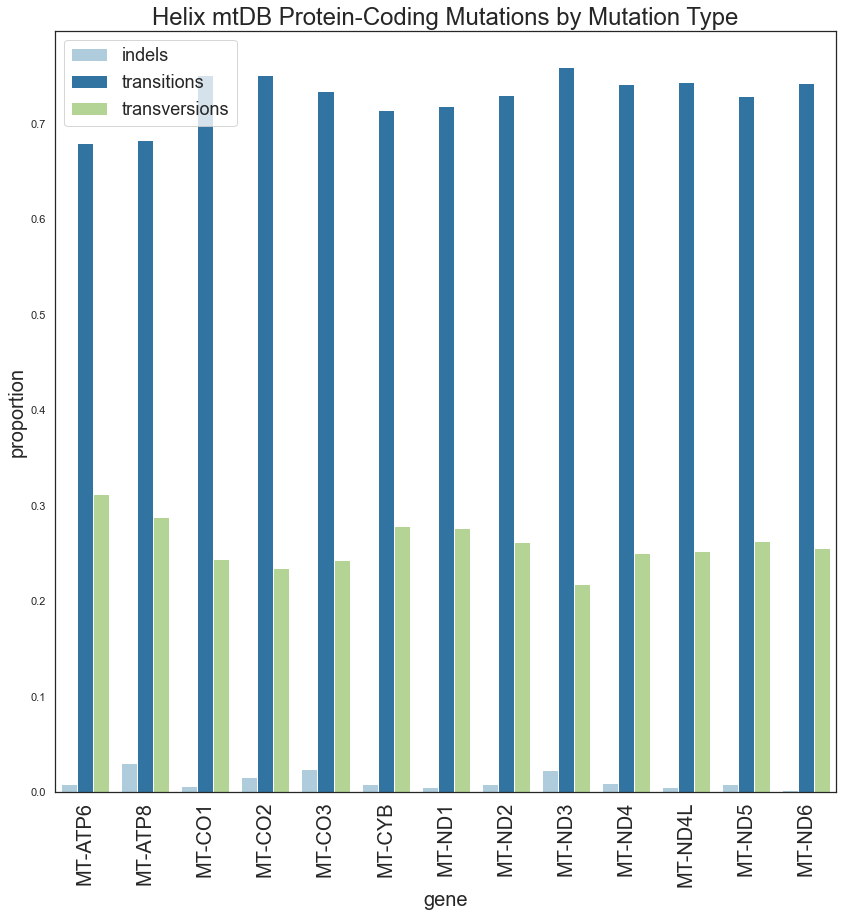

In [26]:
proDF = helixByMutation[helixByMutation['seq_type']=='protein_coding_gene']
plt.figure(figsize=(14,14))
p = sns.barplot(x = proDF.loc[:,'gene'], y = helixByMutation.loc[:,'proportion'], hue = helixByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(proDF['gene'], rotation=90,fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
p.set_title('Helix mtDB Protein-Coding Mutations by Mutation Type', fontsize=24);
plt.savefig('helixProByMut.pdf')

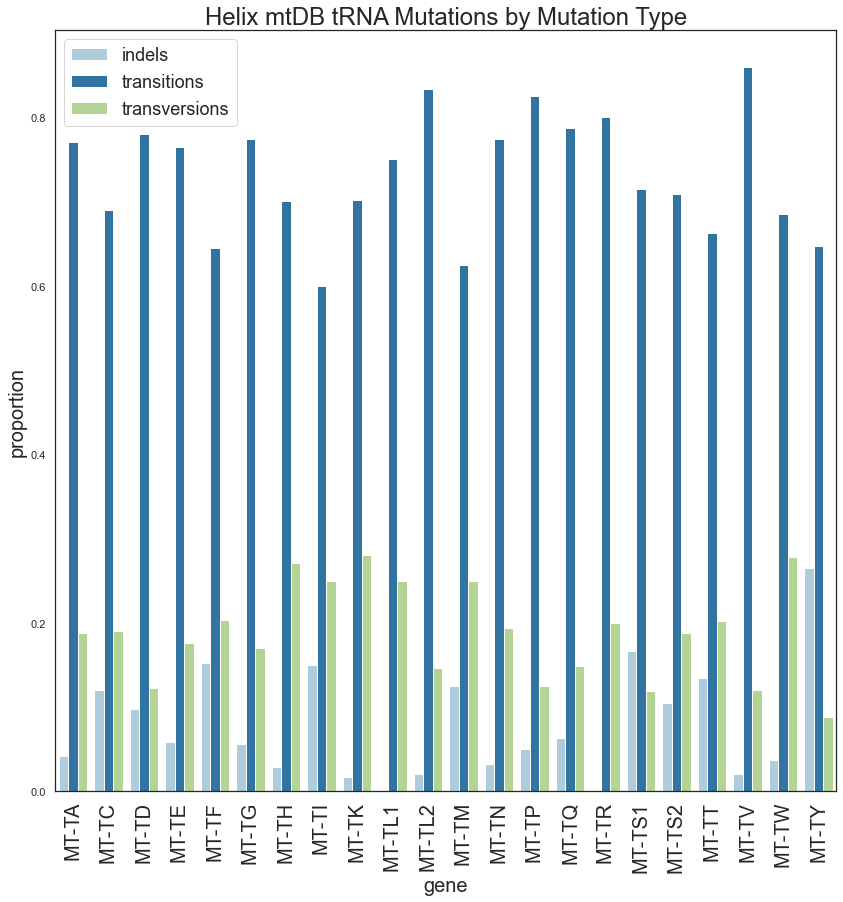

In [27]:
tRNADF = helixByMutation[helixByMutation['seq_type']=='tRNA_gene']
plt.figure(figsize=(14,14))
p = sns.barplot(x = tRNADF.loc[:,'gene'], y = helixByMutation.loc[:,'proportion'], hue = helixByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(tRNADF['gene'], rotation=90,fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
p.set_title('Helix mtDB tRNA Mutations by Mutation Type', fontsize=24);
plt.savefig('helixtRNAByMut.pdf')

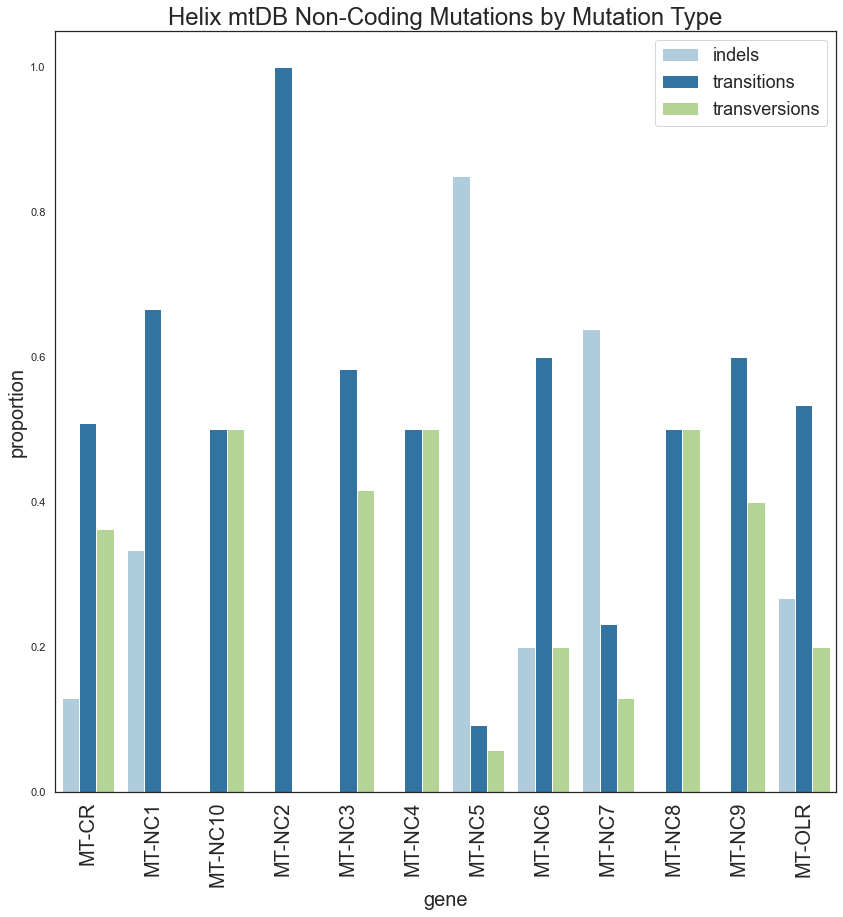

In [28]:
NCDF = helixByMutation[helixByMutation['seq_type']=='non_coding']
plt.figure(figsize=(14,14))
p = sns.barplot(x = NCDF.loc[:,'gene'], y = helixByMutation.loc[:,'proportion'], hue = helixByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(NCDF['gene'],rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
p.set_title('Helix mtDB Non-Coding Mutations by Mutation Type', fontsize=24);
plt.savefig('helixNCbyMut.pdf')

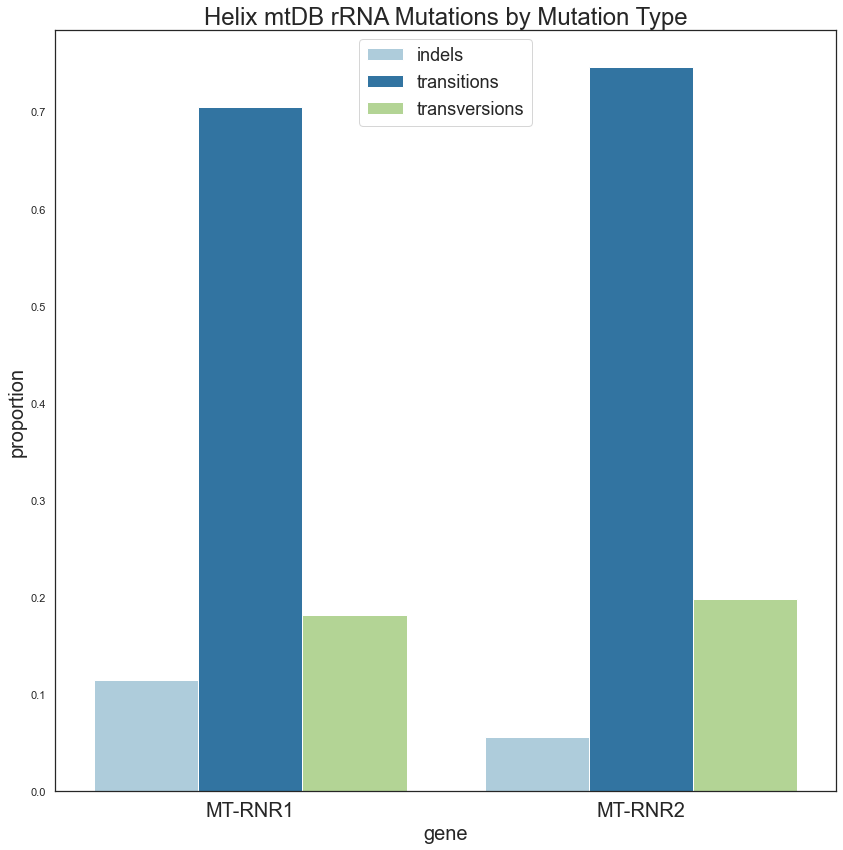

In [29]:
rRNADF = helixByMutation[helixByMutation['seq_type']=='rRNA_gene']
plt.figure(figsize=(14,14))
p = sns.barplot(x = rRNADF.loc[:,'gene'], y = helixByMutation.loc[:,'proportion'], hue = helixByMutation.loc[:,'mutation'], palette = sns.color_palette("Paired"))
p.set_xticklabels(rRNADF['gene'], fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('proportion', fontsize=20)
p.legend(fontsize=18)
p.set_title('Helix mtDB rRNA Mutations by Mutation Type', fontsize=24);
plt.savefig('helixrRNAbyMut.pdf')

### Import of total invariant nucleotides based on the Helix mtDB 
- These are all the invariant bases present in human mtDNA for which no variants exist in the Helix mtDB ("Helix mtDB Invariant Bases")

In [5]:
totInv = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/invariant.csv")
totInv.head(20)

,wildtype,base,annotation
0,G,1,NaN
1,A,2,NaN
2,T,3,NaN
3,C,4,NaN
4,C,6,NaN
5,A,7,NaN
6,G,8,NaN
7,G,9,NaN
8,A,13,NaN
9,T,14,NaN


2            2367
1            1650
3              67
anticodon      36
Name: annotation, dtype: int64


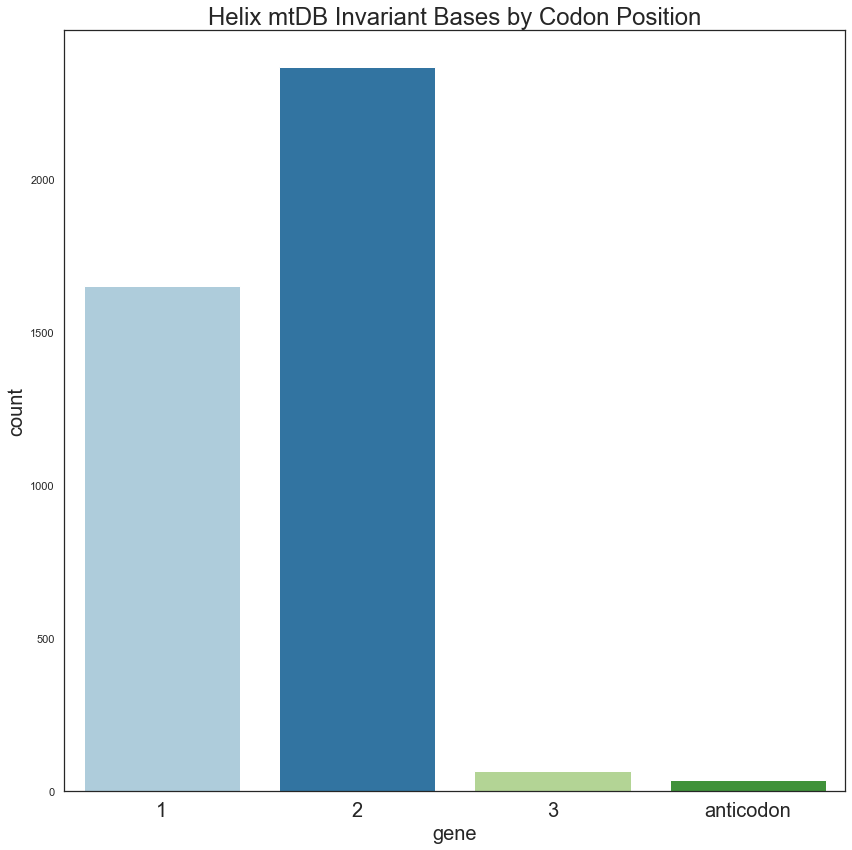

In [7]:
print(totInv['annotation'].value_counts())
totInv['annotation'].value_counts()
invDF = pd.DataFrame(totInv['annotation'].value_counts())
invDF.reset_index(inplace=True)
invDF.columns = ['position', 'count'] 
new_index = [1, 0, 2, 3]
invDF = invDF.reindex(new_index)
invDF.reset_index(inplace=True)
invDF = invDF.drop(columns=['index'])
# invDF = totInv[totInv['annotation']!= 'NaN']
invDF.head(10)

plt.figure(figsize=(14,14))
p = sns.barplot(x = invDF.loc[:,'position'], y = invDF.loc[:,'count'], palette = sns.color_palette("Paired"))
p.set_title('Helix mtDB Invariant Bases by Codon Position', fontsize=24);
p.set_xticklabels(invDF['position'], fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)
plt.savefig('helixInvByCodon.pdf')

### Import of annotated nucleotides present in the Helix mtDB

In [32]:
helixBases = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/intermediateTables/helixBases.csv")
helixBases.head(10)

,wildtype.x,base,annotation
0,A,5,NaN
1,T,10,NaN
2,C,11,NaN
3,T,12,NaN
4,A,16,NaN
5,C,18,NaN
6,C,19,NaN
7,T,20,NaN
8,A,21,NaN
9,T,22,NaN


In [33]:
print(helixBases['annotation'].value_counts())
helixBases['annotation'].value_counts()
helDF = pd.DataFrame(helixBases['annotation'].value_counts())
helDF.reset_index(inplace=True)
helDF.columns = ['position', 'count'] 
helDF.head(10)
new_index = [1, 2, 0, 3]
helDF = helDF.reindex(new_index)
helDF.reset_index(inplace=True)
helDF = helDF.drop(columns=['index'])
# invDF = totInv[totInv['annotation']!= 'NaN']
helDF.head(10)

3            3712
1            2132
2            1413
anticodon       6
Name: annotation, dtype: int64


,position,count
0,1,2132
1,2,1413
2,3,3712
3,anticodon,6


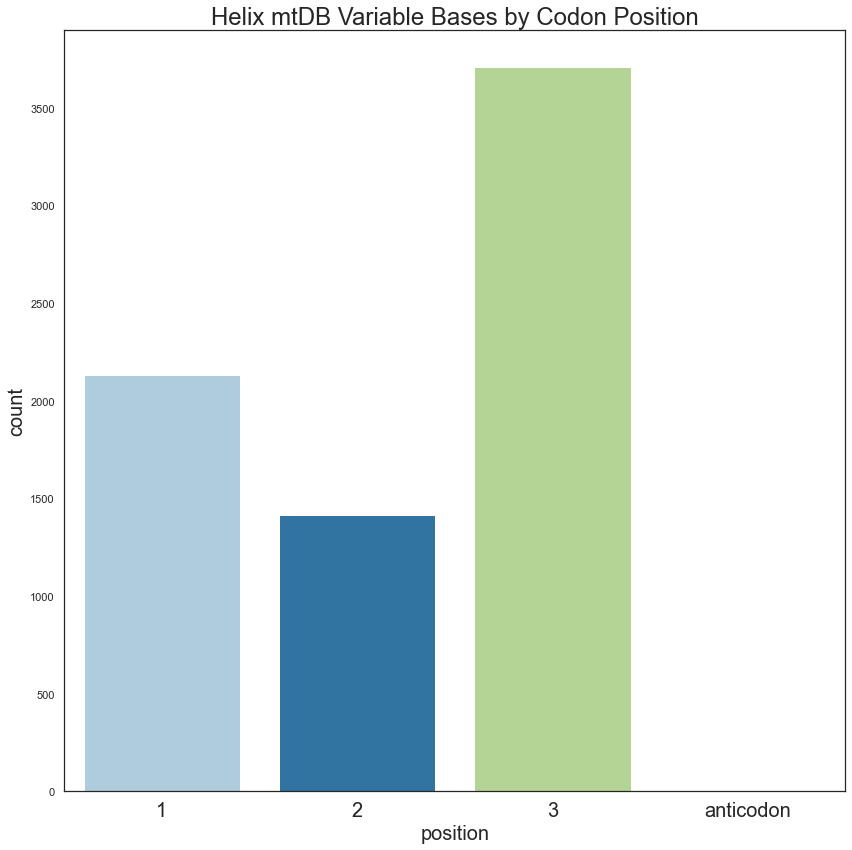

In [34]:
plt.figure(figsize=(14, 14))
p = sns.barplot(x = helDF.loc[:,'position'], y = helDF.loc[:,'count'], palette = sns.color_palette("Paired"))
p.set_title('Helix mtDB Variable Bases by Codon Position', fontsize=24);
p.set_xticklabels(helDF['position'], fontsize=20)
p.set_xlabel('position', fontsize=20)
p.set_ylabel('count', fontsize=20)
plt.savefig('helixVariableByCodon.pdf')

### Import of invariant  nucleotides based on Helix mtDB found among MitoMap candidate pathogenic mutations
This table presents the intersection between invariant bases that are absent from the Helix mtDB but present in the MitoMap list of candidate pathogenic mutations

- Out of 6316 total invariant bases 252 unique invariant bases appear in the MitoMap database
- We need to chartacterize these invariant bases in terms of codon positions affected, mutation type, sequence feature/genes, and plasmicity

In [35]:
invOverlap = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/invTotOverlap.csv")
invOverlap = invOverlap.iloc[:,1:]
invOverlap.head(20)

,wildtype,base,annotation,gene,allele,change,homoplasmic,heteroplasmic,pathogenic,disease
0,A,302,NaN,MT-CRb,A-ACC,noncoding,NaN,NaN,yes,Higher in melanoma patient group
1,C,309,NaN,MT-CRb,C-CC,noncoding,NaN,NaN,yes,AD-weakly associated
2,T,310,NaN,MT-CRb,T-C,noncoding,NaN,NaN,yes,Possible protective factor for normal tension ...
3,T,310,NaN,MT-CRb,T-TC,noncoding,NaN,NaN,yes,Melanoma patients
4,G,3376,1,MT-ND1,G-A,E24K,yes,no,yes,LHON MELAS overlap
5,G,3380,2,MT-ND1,G-A,R25Q,no,yes,yes,MELAS
6,G,3407,2,MT-ND1,G-A,R34H,yes,no,yes,HCM / Muscle involvement
7,G,3481,1,MT-ND1,G-A,E59K,no,yes,yes,MELAS / Progressive Encephalomyopathy
8,C,3551,2,MT-ND1,C-T,A82V,yes,no,yes,LHON
9,A,3634,1,MT-ND1,A-G,S110G,yes,no,yes,LHON


### Counts of homoplasmic and heteroplasmic alleles that are invariant for Helix mtDB but appear in MitoMap
- can these be converted to dataframes or exported to Excel to make printable tables?

In [36]:
invHom = invOverlap.groupby(['gene'])['homoplasmic'].value_counts()
invHom.to_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/invHom.csv')

In [37]:
invHet = invOverlap.groupby(['gene'])['heteroplasmic'].value_counts()
invHet.to_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/invHet.csv')

In [38]:
invHom = invOverlap.groupby(['homoplasmic'])['gene'].value_counts()
invHom.to_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/invHom.csv')

In [39]:
invHet = invOverlap.groupby(['heteroplasmic'])['gene'].value_counts()
invHet.to_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/invHet.csv')

### Importing unique shared candidate pathogenic alleles common to Helix mtDB and MitoMap

In [3]:
uniqueOverlaps = pd.read_csv("/Users/leekapp/Desktop/CS254/Assignments/FinalProject/uniqueOverlaps.csv")
uniqueOverlaps.head(10)

,base,wildtype,gene,alleles,mutation,annotation,helix_feature,MM_allele,MM_feature,homoplasmic,heteroplasmic,counts_hom,AF_hom,counts_het,AF_het,pathogenic,disease
0,114,C,MT-CRb,"[""C"",""T""]",transition,NaN,non_coding,C-T,noncoding,yes,yes,1974,0.010072,101,0.000515,yes,BD-associated
1,146,T,MT-CRb,"[""T"",""C""]",transition,NaN,non_coding,T-C,noncoding,yes,yes,25525,0.130241,622,0.003174,yes,Absence of Endometriosis
2,150,C,MT-CRb,"[""C"",""T""]",transition,NaN,non_coding,C-T,noncoding,yes,yes,19751,0.100779,168,0.000857,yes,Longevity / Cervical Carcinoma / HPV infection...
3,185,G,MT-CRb,"[""G"",""A""]",transition,NaN,non_coding,G-A,noncoding,yes,yes,10568,0.053923,317,0.001617,yes,Low VO2max response
4,195,T,MT-CRb,"[""T"",""C""]",transition,NaN,non_coding,T-C,noncoding,yes,yes,34496,0.176015,1050,0.005358,yes,BD-associated / melanoma pts
5,228,G,MT-CRb,"[""G"",""A""]",transition,NaN,non_coding,G-A,noncoding,yes,yes,9673,0.049356,191,0.000975,yes,Low VO2max response
6,295,C,MT-CRb,"[""C"",""T""]",transition,NaN,non_coding,C-T,noncoding,yes,yes,15983,0.081553,8,0.000041,yes,Low VO2max response
7,462,C,MT-CRb,"[""C"",""T""]",transition,NaN,non_coding,C-T,noncoding,yes,yes,12947,0.066062,21,0.000107,yes,Low VO2max response
8,489,T,MT-CRb,"[""T"",""C""]",transition,NaN,non_coding,T-C,noncoding,yes,yes,25439,0.129802,60,0.000306,yes,Low VO2max response
9,499,G,MT-CRb,"[""G"",""A""]",transition,NaN,non_coding,G-A,noncoding,yes,yes,8032,0.040983,44,0.000225,yes,Endometriosis / possible protective factor for...


1.0    147
2.0     93
3.0     40
Name: annotation, dtype: int64


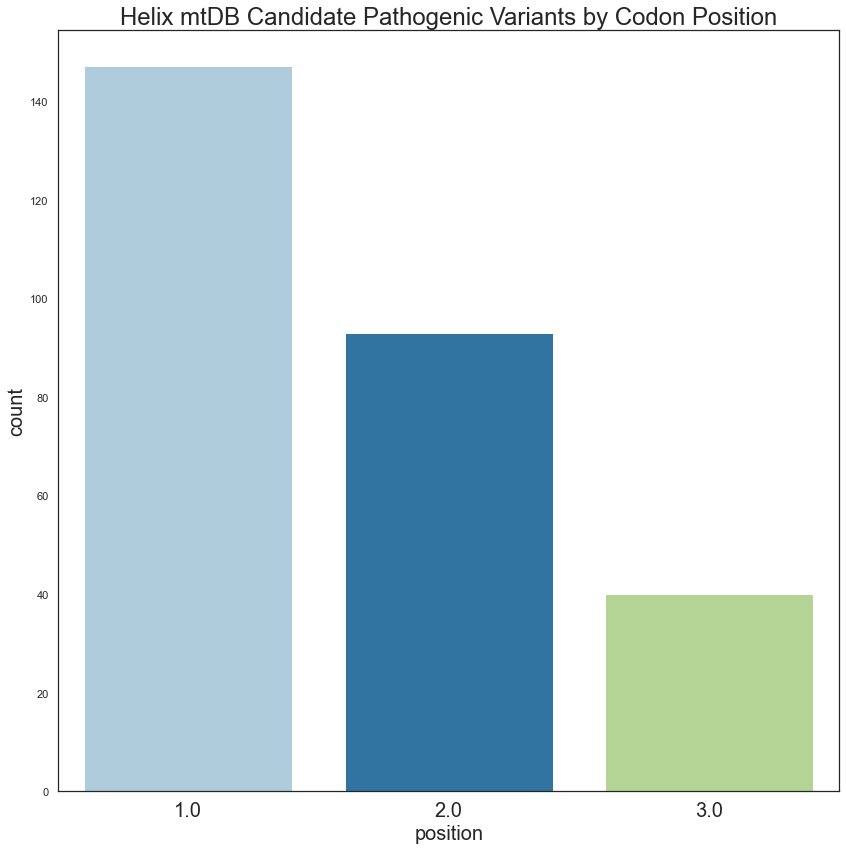

In [4]:
print(uniqueOverlaps['annotation'].value_counts())
pathPosDF = pd.DataFrame(uniqueOverlaps['annotation'].value_counts())
pathPosDF.reset_index(inplace=True)
pathPosDF.columns = ['position', 'count'] 
pathPosDF

plt.figure(figsize=(14,14))
p = sns.barplot(x = pathPosDF.loc[:,'position'], y = pathPosDF.loc[:,'count'], palette = sns.color_palette("Paired"))
p.set_title('Helix mtDB Candidate Pathogenic Variants by Codon Position', fontsize=24);
p.set_xticklabels(pathPosDF['position'], fontsize=20)
p.set_xlabel('position', fontsize=20)
p.set_ylabel('count', fontsize=20)
plt.savefig('candHelixByCodon.pdf')

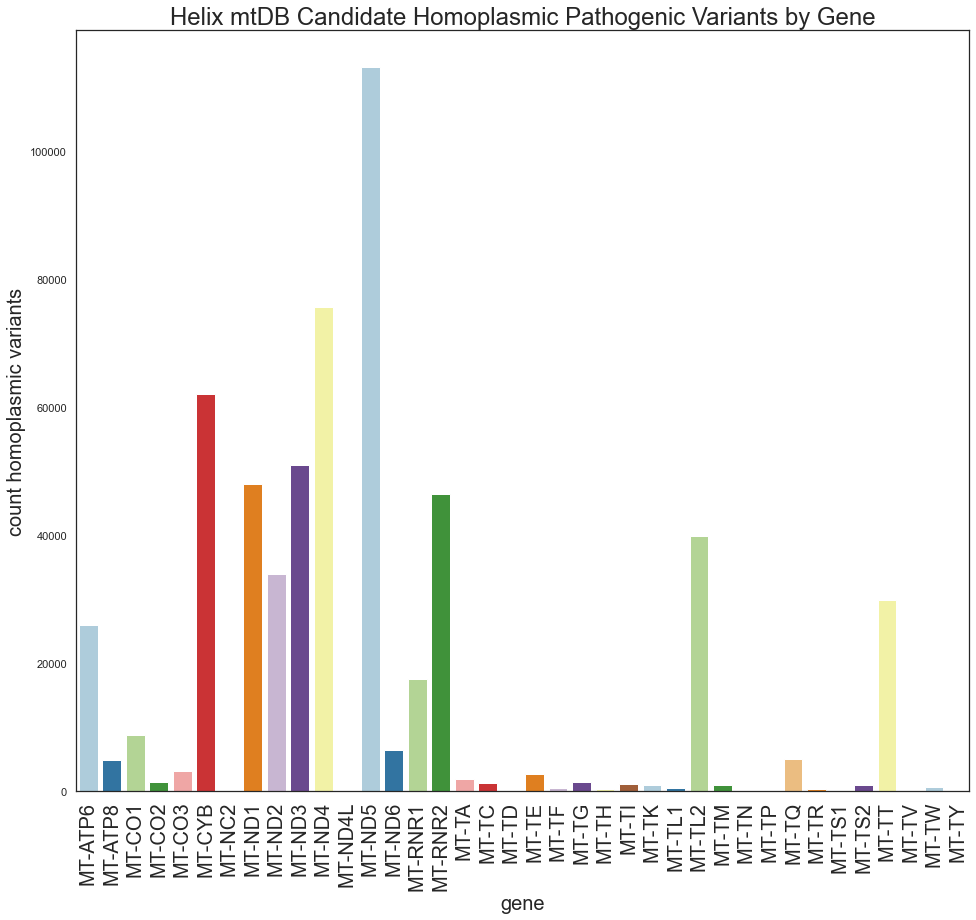

In [5]:
uniqueOverlaps.groupby(['gene'])['counts_hom'].sum()
countsHom = pd.DataFrame(uniqueOverlaps.groupby(['gene'])['counts_hom'].sum())
countsHom.reset_index(inplace=True)
countsHom.head(10)
noCR = countsHom.drop([5,6])

plt.figure(figsize=(16,14))
p = sns.barplot(x = noCR.loc[:,'gene'], y = noCR.loc[:,'counts_hom'], palette = sns.color_palette("Paired"))
p.set_xticklabels(noCR['gene'], rotation=90, fontsize=20)
p.set_xlabel('gene', fontsize=20)
p.set_ylabel('count', fontsize=20)

p.set(ylabel='count homoplasmic variants')
p.set_title('Helix mtDB Candidate Homoplasmic Pathogenic Variants by Gene', fontsize=24);
plt.savefig('helixCandHomoByGene.pdf')

# plt.figure(figsize=(16,14))
# p = sns.barplot(x = countsHom.loc[:,'gene'], y = countsHom.loc[:,'counts_hom'], palette = sns.color_palette("Paired"))
# p.set_xticklabels(countsHom['gene'], rotation=90, fontsize=20)
# p.set_xlabel('position', fontsize=20)
# p.set_ylabel('count', fontsize=20)

# p.set(ylabel='count homoplasmic variants')
# p.set_title('Helix mtDB Candidate Homoplasmic Pathogenic Variants by Gene', fontsize=24);
# plt.savefig('helixCandHomoByGene.pdf')

In [44]:
MMHetAlleles = uniqueOverlaps.groupby(['gene'])['counts_het'].sum()
MMHetAlleles.to_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/mmHetAlleles.csv')

In [53]:
MMHomAlleles = uniqueOverlaps.groupby(['gene'])['counts_hom'].sum()
MMHomAlleles.to_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/mmHomAlleles.csv')

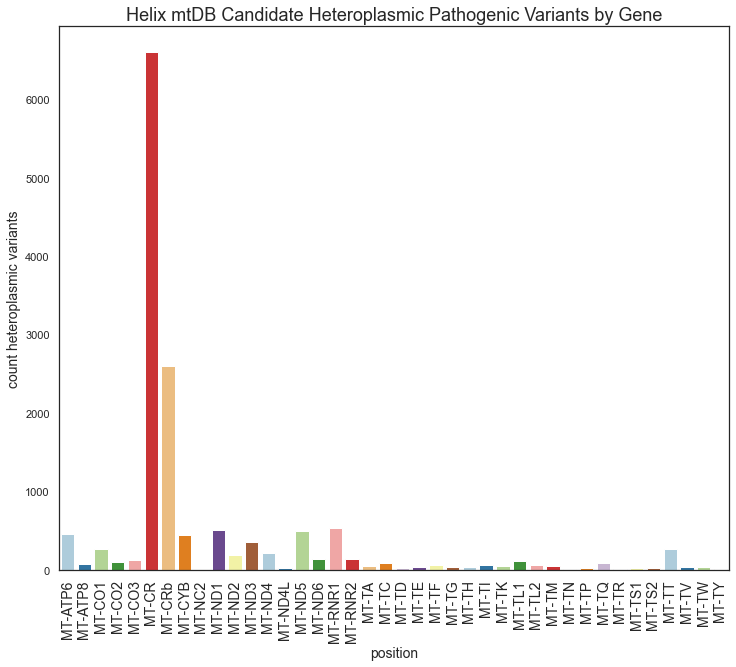

In [51]:
uniqueOverlaps.groupby(['gene'])['counts_het'].sum()
countsHet = pd.DataFrame(uniqueOverlaps.groupby(['gene'])['counts_het'].sum())
countsHet.reset_index(inplace=True)

plt.figure(figsize=(12,10))
p = sns.barplot(x = countsHet.loc[:,'gene'], y = countsHet.loc[:,'counts_het'], palette = sns.color_palette("Paired"))
p.set_xticklabels(countsHet['gene'], rotation=90,fontsize=14)
p.set_xlabel('position', fontsize=14)
p.set_ylabel('count', fontsize=14)
p.set(ylabel='count heteroplasmic variants')
p.set_title('Helix mtDB Candidate Heteroplasmic Pathogenic Variants by Gene', fontsize=18);
plt.savefig('helixCandHetByGene.pdf')

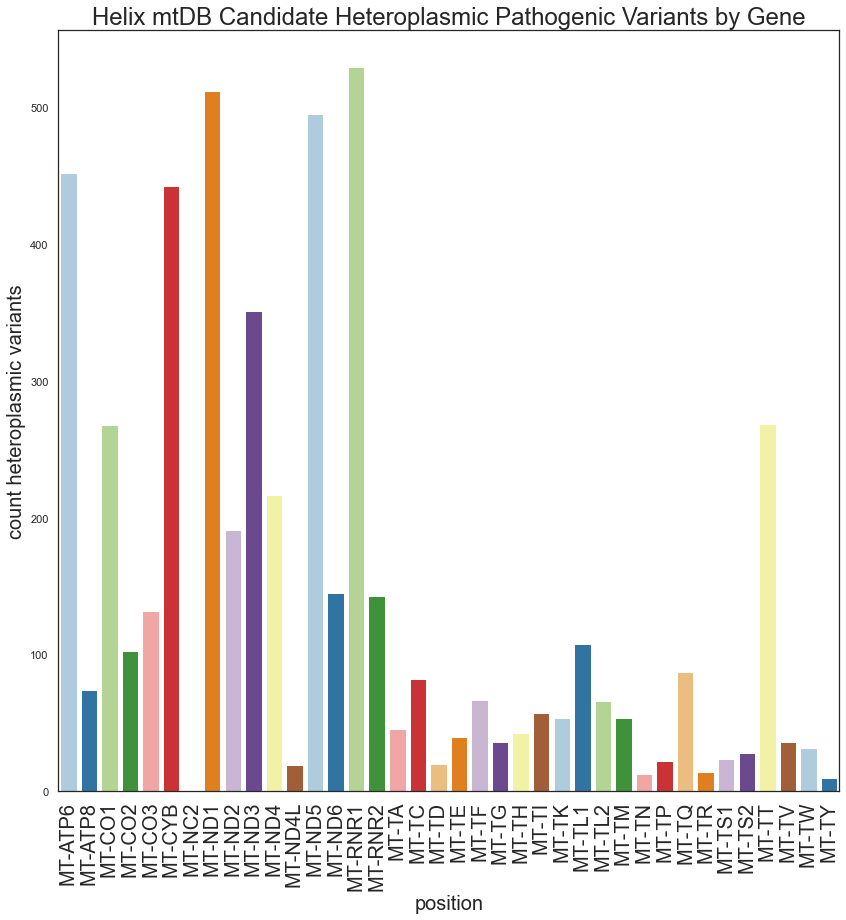

In [6]:
uniqueOverlaps.groupby(['gene'])['counts_het'].sum()
countsHet = pd.DataFrame(uniqueOverlaps.groupby(['gene'])['counts_het'].sum())
countsHet.reset_index(inplace=True)
noCR = countsHet.drop([5,6])

plt.figure(figsize=(14,14))
p = sns.barplot(x = noCR.loc[:,'gene'], y = noCR.loc[:,'counts_het'], palette = sns.color_palette("Paired"))
p.set_xticklabels(noCR['gene'], rotation=90,fontsize=20)
p.set_xlabel('position', fontsize=20)
p.set_ylabel('count', fontsize=20)
p.set(ylabel='count heteroplasmic variants')
p.set_title('Helix mtDB Candidate Heteroplasmic Pathogenic Variants by Gene', fontsize=24);
plt.savefig('helixCandHetNoCr.pdf')

### The Helix mtDB was labled  by merging the unique overlap dataset with the original Helix data in R

In [51]:
labeledHelix = pd.read_csv('/Users/leekapp/Desktop/CS254/Assignments/FinalProject/labeledHelix.csv')
labeledHelix.head(20)

,base,gene,allele,annotation,counts_hom,AF_hom,counts_het,AF_het,MM_counts_hom,MM_AF_hom,...,MM_AF_het,pathogenic,helix_feature,mutation,MM_mutation,MM_allele,MM_feature,homoplasmic,heteroplasmic,disease
0,5,MT-CRb,"[""A"",""C""]",NaN,1,0.000005,0,0.000000,NaN,NaN,...,NaN,NaN,non_coding,transversion,NaN,NaN,NaN,NaN,NaN,NaN
1,10,MT-CRb,"[""T"",""C""]",NaN,7,0.000036,1,0.000005,NaN,NaN,...,NaN,NaN,non_coding,transition,NaN,NaN,NaN,NaN,NaN,NaN
2,11,MT-CRb,"[""C"",""T""]",NaN,0,0.000000,1,0.000005,NaN,NaN,...,NaN,NaN,non_coding,transition,NaN,NaN,NaN,NaN,NaN,NaN
3,12,MT-CRb,"[""T"",""C""]",NaN,1,0.000005,0,0.000000,NaN,NaN,...,NaN,NaN,non_coding,transition,NaN,NaN,NaN,NaN,NaN,NaN
4,16,MT-CRb,"[""A"",""T""]",NaN,273,0.001393,4,0.000020,NaN,NaN,...,NaN,NaN,non_coding,transversion,NaN,NaN,NaN,NaN,NaN,NaN
5,18,MT-CRb,"[""C"",""T""]",NaN,3,0.000015,1,0.000005,NaN,NaN,...,NaN,NaN,non_coding,transition,NaN,NaN,NaN,NaN,NaN,NaN
6,19,MT-CRb,"[""C"",""T""]",NaN,1,0.000005,0,0.000000,NaN,NaN,...,NaN,NaN,non_coding,transition,NaN,NaN,NaN,NaN,NaN,NaN
7,20,MT-CRb,"[""T"",""A""]",NaN,2,0.000010,1,0.000005,NaN,NaN,...,NaN,NaN,non_coding,transversion,NaN,NaN,NaN,NaN,NaN,NaN
8,21,MT-CRb,"[""A"",""AT""]",NaN,2,0.000010,0,0.000000,NaN,NaN,...,NaN,NaN,non_coding,in-del,NaN,NaN,NaN,NaN,NaN,NaN
9,21,MT-CRb,"[""A"",""G""]",NaN,0,0.000000,1,0.000005,NaN,NaN,...,NaN,NaN,non_coding,transition,NaN,NaN,NaN,NaN,NaN,NaN
